# Neural Network Project

* Problem Statement

Street View House Numbers (SHVN) is a real-world image dataset that consists of images obtained from house numbers in Google street view images. The dataset can be used to automatically transcribe an address number from a geo-located patch of pixels and the associated transcribed number can be used to pinpoint the location of the building it represents.
The challenge in transcribing text from images is that the visual appearance of text in the image dataset varies based on large range of fonts, colours, styles, orientation and character arrangements. The problem is further complicated by environmental factors such as lighting, shadows, secularities and occlusions as well as image acquisition factors such as resolution, motion and focus blurs.

* Objective
 
The objective of the project is to learn how to implement a simple image classification pipeline based on deep neural network using Street View House Numbers (SVHN) dataset.
The goals of this project are as follows:


Load Dataset

Understand the basic Image Classification pipeline and the data-driven approach (train/predict stages) Data fetching and understand the train/val/test splits. Implement and apply a deep neural network classifier including (feedforward neural network, RELU, activations) Implement batch normalization for training the neural network Print the classification accuracy metrics

# 1. Load Dataset

In [2]:
#Importing important libraries
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
#To enable plotting graphs in Jupyter notebook
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from keras.layers import Activation, Dense
from keras.layers import BatchNormalization, Dropout
from keras import optimizers
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


Add setting for libraries

# 2. Understand the basic Image Classification pipeline and the data-driven approach (train/predict stages)

Load the dataset

In [4]:
#Open the file as readonly
data1=h5py.File("SVHN_single_grey1.h5",'r')

#Load the training and test data
X_train=data1['X_train']
X_test=data1['X_test']
X_val=data1['X_val']
y_train=data1['y_train']
y_test=data1['y_test']
y_val=data1['y_val']

In [5]:
#Printing the shape and data type of training, testing, and validation data
print("Training data X-- Shape :", X_train.shape,"and Data Type : ", X_train.dtype)
print("Testing data X-- Shape :", X_test.shape,"and Data Type : ", X_test.dtype)
print("Validation data X-- Shape :", X_val.shape,"and Data Type : ", X_val.dtype)
print("Training data y-- Shape :", y_train.shape,"and Data Type : ", y_train.dtype)
print("Testing data y-- Shape :", y_test.shape,"and Data Type : ", y_test.dtype)
print("Validation data y-- Shape :", y_val.shape,"and Data Type : ", y_val.dtype)

Training data X-- Shape : (42000, 32, 32) and Data Type :  float32
Testing data X-- Shape : (18000, 32, 32) and Data Type :  float32
Validation data X-- Shape : (60000, 32, 32) and Data Type :  float32
Training data y-- Shape : (42000,) and Data Type :  uint8
Testing data y-- Shape : (18000,) and Data Type :  uint8
Validation data y-- Shape : (60000,) and Data Type :  uint8


Understand the data

In [4]:
X_train.shape

(42000, 32, 32)

* The training dataset has 42k images of size 32*32

In [5]:
y_train.shape

(42000,)

* There are 42k labels that provides the correct classification for images in our training dataset

In [6]:
X_test.shape

(18000, 32, 32)

* There are 18k labels that provides the correct classification for images in our test dataset

Display the first 12 images of training dataset

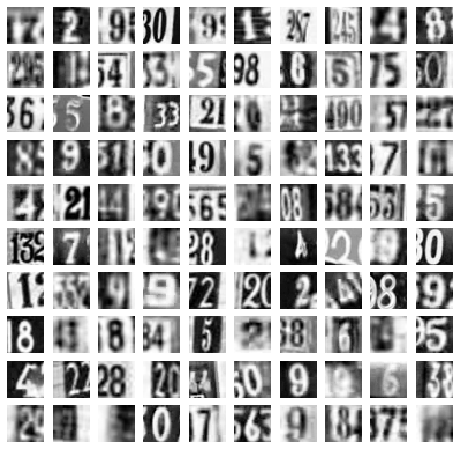

In [7]:
fig=plt.figure(figsize=(8,8))
columns=10
rows=10
for i in range(1, columns*rows+1):
    img=X_test[i]
    fig.add_subplot(rows,columns,i)
    plt.imshow(img,cmap='Greys')
    plt.axis('off')
plt.show()

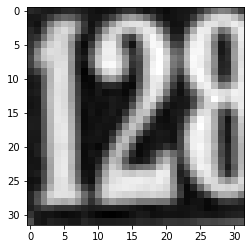

Label:  2


In [8]:
# show the number in the dataset
plt.imshow(X_train[0],cmap='gray')    
plt.show()
print('Label: ', y_train[0])

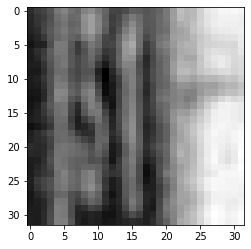

Label:  1


In [9]:
# show the number in the dataset
plt.imshow(X_test[0],cmap='gray')    
plt.show()
print('Label: ', y_test[0])

In [10]:
y_train[0:12]

array([2, 6, 7, 4, 4, 0, 3, 0, 7, 3, 1, 0], dtype=uint8)

* The challenge in recognizing the images is evident from the above sample as some of the images are blur while others have multiple digits displayed. Also the same digit may appear different in different images

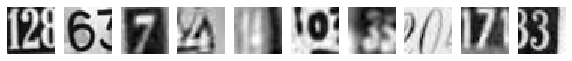

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [11]:
# visualizing the first 10 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i].reshape(32,32),cmap='gray')
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

# 3. Data fetching and understand the train/val/test splits. (15 points)

* Data Pre-Processing

The following steps will be performed as part of data pre-processing

1. Flatten the data
2. Normalize the data
3. Change the labels to one hot encoding

In [12]:
#Reshape data from 2D to 1D -> 32X32 to 1024
X_train = np.asarray(X_train).reshape(42000,1024)
X_test = np.asarray(X_test).reshape(18000,1024)
X_val = np.asarray(X_val).reshape(60000,1024)

In [13]:
# 1.Flatten the images on both training and test to 1024 as the image size is 32*32
X_train_flatten = X_train.reshape(X_train.shape[0], 1024).astype('float32')
X_test_flatten = X_test.reshape(X_test.shape[0], 1024).astype('float32')

In [14]:
X_train_flatten.shape

(42000, 1024)

In [15]:
X_test_flatten.shape

(18000, 1024)

In [16]:
# Check the data of the first image in the training dataset
X_train_flatten[0]

array([33.0704, 30.2601, 26.852 , ..., 49.6682, 50.853 , 53.0377],
      dtype=float32)

The above data shows the pixel values for first image. These values range from 0 to 255. Hence to normalize the data (we need to change the values to range between 0 and 1) we will divide each of them by 255

In [17]:
# 2. Normalize the data
X_train_norm = X_train_flatten/255
X_test_norm = X_test_flatten/255

In [18]:
#Verify that data of the first image in the training dataset
X_train_norm[0]

array([0.12968785, 0.11866706, 0.10530196, ..., 0.19477727, 0.19942354,
       0.20799099], dtype=float32)

In [19]:
#Delete X_train_flatten and X_test_flatten as it won't be used anymore
del(X_train_flatten, X_test_flatten)

* One hot encoding of labels

The output of the network needs to classify the images between 0 to 9 i.e there are 10 classes. The loss function used in our neural network will be cross entropy which expects the data in one hot encoding.

In [20]:
#Reshape data from 2D to 1D -> 32X32 to 1024
X_train = np.asarray(X_train).reshape(42000,1024)
X_test = np.asarray(X_test).reshape(18000,1024)
X_val = np.asarray(X_val).reshape(60000,1024)

In [21]:
n_classes = 10
y_train_enc = to_categorical(y_train, n_classes)
y_test_enc = to_categorical(y_test, n_classes)
y_train_enc[0]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [22]:
# Converting output label to multiple values
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)

y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

y_val = tf.keras.utils.to_categorical(y_val, num_classes=10)

print(X_train.shape, X_test.shape,X_val.shape, y_train.shape, y_test.shape,y_val.shape)

(42000, 1024) (18000, 1024) (60000, 1024) (42000, 10) (18000, 10) (60000, 10)


# 4. Implement and apply a deep neural network classifier including (feedforward neural network, RELU, activations) (25 points)

In [23]:
# Define the architecture

In [24]:
# Define a sequential model
keras_model = Sequential()

# Input Layer
#Adding Input layer and activation functions ReLU
keras_model.add(Dense(512, kernel_initializer='he_normal',input_shape = (1024, )))
#Adding Activation function
keras_model.add(Activation('relu'))

#Hidden Layer 1
#Adding first Hidden layer
keras_model.add(Dense(256, kernel_initializer='he_normal'))
#Adding Activation function
keras_model.add(Activation('relu'))

#Hidden Layer 2
#Adding second Hidden layer
keras_model.add(Dense(128, kernel_initializer='he_normal'))
#Adding Activation function
keras_model.add(Activation('relu'))

#Hidden Layer 3
#Adding third Hidden layer
keras_model.add(Dense(64, kernel_initializer='he_normal'))
#Adding Activation function
keras_model.add(Activation('relu'))

#Hidden Layer 4
#Adding fourth Hidden layer
keras_model.add(Dense(32, kernel_initializer='he_normal'))
#Adding Activation function
keras_model.add(Activation('relu'))

# Output Layer
#Adding output layer which is of 10 nodes (digits)
keras_model.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
keras_model.add(Activation('softmax'))

In [25]:
# Model Summary

In [26]:
keras_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
activation_3 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

In [27]:
# Compile the model

In [28]:
# The model will use SGD as optimizer with learning rate of 0.01 and cross entropy as loss function
keras_model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

In [29]:
# Fitting the ANN to the Training data
history = keras_model.fit(X_train_norm, y_train_enc, validation_data=(X_test_norm,y_test_enc),batch_size = 200, epochs = 10, verbose = 1)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 3s 66us/step - loss: 2.2895 - accuracy: 0.1384 - val_loss: 2.2644 - val_accuracy: 0.1783
Epoch 2/10
42000/42000 [==============================] - 2s 53us/step - loss: 2.2388 - accuracy: 0.1962 - val_loss: 2.2038 - val_accuracy: 0.2213
Epoch 3/10
42000/42000 [==============================] - 2s 53us/step - loss: 2.1637 - accuracy: 0.2292 - val_loss: 2.1212 - val_accuracy: 0.2374
Epoch 4/10
42000/42000 [==============================] - 2s 57us/step - loss: 2.0850 - accuracy: 0.2599 - val_loss: 2.0439 - val_accuracy: 0.2836
Epoch 5/10
42000/42000 [==============================] - 2s 58us/step - loss: 1.9952 - accuracy: 0.2984 - val_loss: 2.1666 - val_accuracy: 0.2298
Epoch 6/10
42000/42000 [==============================] - 2s 59us/step - loss: 1.9047 - accuracy: 0.3362 - val_loss: 1.8523 - val_accuracy: 0.3591
Epoch 7/10
42000/42000 [==============================] - 2s 59us/st

In [30]:
#Using adam optimizer and Categorical Crossentropy as loss function and Accuracy as the metric to monitor
# compiling the ANN classifier
keras_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [33]:
# Fitting the ANN to the Training data
history = keras_model.fit(X_train_norm, y_train_enc, validation_data=(X_test_norm,y_test_enc),batch_size = 60, epochs = 10, verbose = 1)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 9s 208us/step - loss: 1.6588 - accuracy: 0.4273 - val_loss: 1.4010 - val_accuracy: 0.5336
Epoch 2/10
42000/42000 [==============================] - 8s 199us/step - loss: 1.2094 - accuracy: 0.6112 - val_loss: 1.1960 - val_accuracy: 0.6163
Epoch 3/10
42000/42000 [==============================] - 8s 201us/step - loss: 1.0683 - accuracy: 0.6615 - val_loss: 0.9841 - val_accuracy: 0.6933
Epoch 4/10
42000/42000 [==============================] - 8s 201us/step - loss: 0.9748 - accuracy: 0.6916 - val_loss: 0.9054 - val_accuracy: 0.7203
Epoch 5/10
42000/42000 [==============================] - 9s 203us/step - loss: 0.9253 - accuracy: 0.7047 - val_loss: 0.9282 - val_accuracy: 0.7066
Epoch 6/10
42000/42000 [==============================] - 9s 207us/step - loss: 0.8592 - accuracy: 0.7281 - val_loss: 0.8855 - val_accuracy: 0.7228
Epoch 7/10
42000/42000 [==============================] - 9s 2

* The accuracy of the model on val data is very low either using adam or sgd.

Now, try to change the learning rate in SGD optimizer

As, we are taking learning rate small means model will learn slowly. So, we have to take more number of epoch

* Using ADAM optimizer.
           
           learning rate= 0.0001

In [34]:
#Setting the learning rate  and decay in sgd
sgd = optimizers.sgd(lr = 0.0001)
# compiling the ANN classifier
keras_model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
# Fitting the ANN to the Training data
history = keras_model.fit(X_train_norm, y_train_enc, validation_data=(X_test_norm,y_test_enc),batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples, validate on 18000 samples
Epoch 1/100
42000/42000 [==============================] - 3s 66us/step - loss: 0.6571 - accuracy: 0.7931 - val_loss: 0.7404 - val_accuracy: 0.7758
Epoch 2/100
42000/42000 [==============================] - 2s 53us/step - loss: 0.6389 - accuracy: 0.7991 - val_loss: 0.7282 - val_accuracy: 0.7781
Epoch 3/100
42000/42000 [==============================] - 2s 53us/step - loss: 0.6276 - accuracy: 0.8031 - val_loss: 0.7199 - val_accuracy: 0.7810
Epoch 4/100
42000/42000 [==============================] - 2s 52us/step - loss: 0.6195 - accuracy: 0.8060 - val_loss: 0.7137 - val_accuracy: 0.7829
Epoch 5/100
42000/42000 [==============================] - 2s 57us/step - loss: 0.6134 - accuracy: 0.8076 - val_loss: 0.7087 - val_accuracy: 0.7847
Epoch 6/100
42000/42000 [==============================] - 2s 55us/step - loss: 0.6084 - accuracy: 0.8094 - val_loss: 0.7046 - val_accuracy: 0.7868
Epoch 7/100
42000/42000 [==============================] - 2s 

Epoch 56/100
42000/42000 [==============================] - 3s 63us/step - loss: 0.5609 - accuracy: 0.8242 - val_loss: 0.6679 - val_accuracy: 0.7991
Epoch 57/100
42000/42000 [==============================] - 3s 63us/step - loss: 0.5606 - accuracy: 0.8243 - val_loss: 0.6677 - val_accuracy: 0.7996
Epoch 58/100
42000/42000 [==============================] - 3s 63us/step - loss: 0.5603 - accuracy: 0.8242 - val_loss: 0.6675 - val_accuracy: 0.7996
Epoch 59/100
42000/42000 [==============================] - 3s 62us/step - loss: 0.5601 - accuracy: 0.8244 - val_loss: 0.6673 - val_accuracy: 0.7997
Epoch 60/100
42000/42000 [==============================] - 3s 62us/step - loss: 0.5598 - accuracy: 0.8244 - val_loss: 0.6672 - val_accuracy: 0.7998
Epoch 61/100
42000/42000 [==============================] - 3s 62us/step - loss: 0.5595 - accuracy: 0.8245 - val_loss: 0.6670 - val_accuracy: 0.8001
Epoch 62/100
42000/42000 [==============================] - 3s 62us/step - loss: 0.5593 - accuracy: 0.8245

* The accuracy of the model on val data using ADAM with learning rate=0.0001 has shown significant improvement.

In [35]:
results = keras_model.evaluate(X_val, y_val)
print('Val_acc using simple NN adam : ', results[1])

60000/60000 [==============================] - 3s 57us/step
Val_acc using simple NN adam :  0.8070166707038879


In [36]:
#Store the accuracy results for each model in a dataframe for final comparison
results_on_val = pd.DataFrame({'Method':['NN'], 'accuracy': results[1]},index={'1'})
results_on_val = results_on_val[['Method', 'accuracy']]
results_on_val

,Method,accuracy
1,NN,0.807017


# 5. Implement batch normalization for training the neural network(10 points)

In [37]:
##Initialize the Artificial Neural Network Classifier
keras_model_1 = Sequential()

# Adding Batch normalization layer

In [38]:
# Input Layer
#Adding Input layer and activation functions ReLU
keras_model_1.add(Dense(512, kernel_initializer='he_normal',input_shape = (1024, )))
#Adding BatchNormalization Layer
keras_model_1.add(BatchNormalization())
#Adding Activation function
keras_model_1.add(Activation('relu'))

#Hidden Layer 1
#Adding first Hidden layer
keras_model_1.add(Dense(256, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_1.add(BatchNormalization())
#Adding Activation function
keras_model_1.add(Activation('relu'))

#Hidden Layer 2
#Adding second Hidden layer
keras_model_1.add(Dense(128, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_1.add(BatchNormalization())
#Adding Activation function
keras_model_1.add(Activation('relu'))

#Hidden Layer 3
#Adding third Hidden layer
keras_model_1.add(Dense(64, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_1.add(BatchNormalization())
#Adding Activation function
keras_model_1.add(Activation('relu'))

#Hidden Layer 4
#Adding fourth Hidden layer
keras_model_1.add(Dense(32, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_1.add(BatchNormalization())
#Adding Activation function
keras_model_1.add(Activation('relu'))

# Output Layer
#Adding output layer which is of 10 nodes (digidts)
keras_model_1.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
keras_model_1.add(Activation('softmax'))

In [39]:
keras_model_1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               524800    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
activation_7 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
activation_8 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)              

* Using ADAM optimizer.
             learning rate= 0.0001

In [40]:
#Setting the learning rate  and decay in sgd
adam = optimizers.adam(lr = 0.0001)
# compiling the ANN classifier
keras_model_1.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [41]:
# Fitting the ANN to the Training data
history_1 = keras_model_1.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 13s 298us/step - loss: 2.1428 - accuracy: 0.2510 - val_loss: 2.0138 - val_accuracy: 0.3034
Epoch 2/100
42000/42000 [==============================] - 9s 220us/step - loss: 1.6030 - accuracy: 0.4913 - val_loss: 1.6272 - val_accuracy: 0.4947
Epoch 3/100
42000/42000 [==============================] - 9s 224us/step - loss: 1.3154 - accuracy: 0.6225 - val_loss: 1.4248 - val_accuracy: 0.5549
Epoch 4/100
42000/42000 [==============================] - 10s 229us/step - loss: 1.1212 - accuracy: 0.6892 - val_loss: 1.1931 - val_accuracy: 0.6562
Epoch 5/100
42000/42000 [==============================] - 10s 233us/step - loss: 0.9780 - accuracy: 0.7324 - val_loss: 1.1057 - val_accuracy: 0.6704
Epoch 6/100
42000/42000 [==============================] - 10s 241us/step - loss: 0.8743 - accuracy: 0.7543 - val_loss: 1.1328 - val_accuracy: 0.6530
Epoch 7/100
42000/42000 [===========================

42000/42000 [==============================] - 10s 232us/step - loss: 0.0858 - accuracy: 0.9756 - val_loss: 0.7841 - val_accuracy: 0.7995
Epoch 56/100
42000/42000 [==============================] - 10s 233us/step - loss: 0.0920 - accuracy: 0.9724 - val_loss: 0.5518 - val_accuracy: 0.8543
Epoch 57/100
42000/42000 [==============================] - 10s 233us/step - loss: 0.0823 - accuracy: 0.9772 - val_loss: 0.6451 - val_accuracy: 0.8240
Epoch 58/100
42000/42000 [==============================] - 10s 233us/step - loss: 0.0837 - accuracy: 0.9750 - val_loss: 0.5740 - val_accuracy: 0.8455
Epoch 59/100
42000/42000 [==============================] - 242s 6ms/step - loss: 0.0839 - accuracy: 0.9758 - val_loss: 0.6448 - val_accuracy: 0.8288
Epoch 60/100
42000/42000 [==============================] - 9s 209us/step - loss: 0.0834 - accuracy: 0.9759 - val_loss: 0.6614 - val_accuracy: 0.8270
Epoch 61/100
42000/42000 [==============================] - 9s 212us/step - loss: 0.0787 - accuracy: 0.9770 -

In [42]:
results_1 = keras_model_1.evaluate(X_val, y_val)
print('Val_acc using Batch ANN adam : ', results_1[1])

60000/60000 [==============================] - 8s 126us/step
Val_acc using Batch ANN adam :  0.8244500160217285


In [43]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['NN_Batch_adam'], 'accuracy': [results_1[1]]},index={'2'})
results_on_val= pd.concat([results_on_val, tempResultsDf])
results_on_val = results_on_val[['Method', 'accuracy']]
results_on_val

,Method,accuracy
1,NN,0.807017
2,NN_Batch_adam,0.824450


Implementing (vectorized) backpropagation (cost stochastic gradient descent, cross entropy loss, cost functions)

In [44]:
#Initialize the Artificial Neural Network Classifier
keras_model_2 = Sequential()

In [45]:
# Adding Batch normalization layer

In [46]:
#Adding Input layer and activation functions ReLU
keras_model_2.add(Dense(512, kernel_initializer='he_normal',input_shape = (1024, )))
#Adding BatchNormalization Layer
keras_model_2.add(BatchNormalization())
#Adding Activation function
keras_model_2.add(Activation('relu'))

#Hidden Layer 1
#Adding first Hidden layer
keras_model_2.add(Dense(256, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_2.add(BatchNormalization())
#Adding Activation function
keras_model_2.add(Activation('relu'))

#Hidden Layer 2
#Adding second Hidden layer
keras_model_2.add(Dense(128, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_2.add(BatchNormalization())
#Adding Activation function
keras_model_2.add(Activation('relu'))

#Hidden Layer 3
#Adding third Hidden layer
keras_model_2.add(Dense(64, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_2.add(BatchNormalization())
#Adding Activation function
keras_model_2.add(Activation('relu'))

#Hidden Layer 4
#Adding fourth Hidden layer
keras_model_2.add(Dense(32, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_2.add(BatchNormalization())
#Adding Activation function
keras_model_2.add(Activation('relu'))

# Output Layer
#Adding output layer which is of 10 nodes (digidts)
keras_model_2.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
keras_model_2.add(Activation('softmax'))

In [47]:
keras_model_2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 512)               524800    
_________________________________________________________________
batch_normalization_6 (Batch (None, 512)               2048      
_________________________________________________________________
activation_13 (Activation)   (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_7 (Batch (None, 256)               1024      
_________________________________________________________________
activation_14 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 128)              

* Using SGD optimizer
               learning rate =0.0001

In [49]:
#Setting the learning rate in sgd
sgd = optimizers.adam(lr = 0.0001)
# compiling the ANN classifier
keras_model_2.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [50]:
# Fitting the ANN to the Training data
history_2 = keras_model_2.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 13s 306us/step - loss: 2.1529 - accuracy: 0.2593 - val_loss: 1.9909 - val_accuracy: 0.3289
Epoch 2/100
42000/42000 [==============================] - 9s 221us/step - loss: 1.6258 - accuracy: 0.4864 - val_loss: 1.6307 - val_accuracy: 0.4656
Epoch 3/100
42000/42000 [==============================] - 9s 217us/step - loss: 1.3165 - accuracy: 0.6247 - val_loss: 1.3735 - val_accuracy: 0.5946
Epoch 4/100
42000/42000 [==============================] - 9s 219us/step - loss: 1.1097 - accuracy: 0.6967 - val_loss: 1.2380 - val_accuracy: 0.6355
Epoch 5/100
42000/42000 [==============================] - 9s 224us/step - loss: 0.9678 - accuracy: 0.7346 - val_loss: 1.1147 - val_accuracy: 0.6712
Epoch 6/100
42000/42000 [==============================] - 10s 229us/step - loss: 0.8575 - accuracy: 0.7622 - val_loss: 0.9837 - val_accuracy: 0.7227
Epoch 7/100
42000/42000 [=============================

42000/42000 [==============================] - 10s 240us/step - loss: 0.0882 - accuracy: 0.9746 - val_loss: 0.5431 - val_accuracy: 0.8476
Epoch 56/100
42000/42000 [==============================] - 10s 250us/step - loss: 0.0829 - accuracy: 0.9763 - val_loss: 0.6434 - val_accuracy: 0.8336
Epoch 57/100
42000/42000 [==============================] - 10s 237us/step - loss: 0.0817 - accuracy: 0.9770 - val_loss: 0.8551 - val_accuracy: 0.7821
Epoch 58/100
42000/42000 [==============================] - 10s 233us/step - loss: 0.0815 - accuracy: 0.9765 - val_loss: 0.5955 - val_accuracy: 0.8418
Epoch 59/100
42000/42000 [==============================] - 10s 236us/step - loss: 0.0862 - accuracy: 0.9747 - val_loss: 0.7742 - val_accuracy: 0.8023
Epoch 60/100
42000/42000 [==============================] - 10s 240us/step - loss: 0.0833 - accuracy: 0.9747 - val_loss: 0.5997 - val_accuracy: 0.8469
Epoch 61/100
42000/42000 [==============================] - 10s 237us/step - loss: 0.0797 - accuracy: 0.976

In [52]:
results_2 = keras_model_2.evaluate(X_val, y_val)
print('Val_acc using BatchNorm sgd : ', results_2[1])

60000/60000 [==============================] - 8s 130us/step
Val_acc using BatchNorm sgd :  0.8500999808311462


In [53]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['NN_Batch_sgd'], 'accuracy': [results_2[1]]},index={'3'})
results_on_val= pd.concat([results_on_val, tempResultsDf])
results_on_val = results_on_val[['Method', 'accuracy']]
results_on_val

,Method,accuracy
1,NN,0.807017
2,NN_Batch_adam,0.824450
3,NN_Batch_sgd,0.850100


* The batch normalization using SGD optimizer is giving better results than using adam optimizer.

# Implementing batch normalization and Dropout for training the neural network

In [54]:
##Initialize the Artificial Neural Network Classifier
keras_model_3 = Sequential()

* Adding BatchNormalization Layer and Dropout Layer (0.5)

In [55]:
# Input Layer
#Adding Input layer and activation functions ReLU
keras_model_3.add(Dense(512, kernel_initializer='he_normal',input_shape = (1024, )))
#Adding BatchNormalization Layer
keras_model_3.add(BatchNormalization())
#Adding Activation function
keras_model_3.add(Activation('relu'))
#Adding Dropout Layer
keras_model_3.add(Dropout(0.5))

#Hidden Layer 1
#Adding first Hidden layer
keras_model_3.add(Dense(256,kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_3.add(BatchNormalization())
#Adding Activation function
keras_model_3.add(Activation('relu'))
#Adding Dropout Layer
keras_model_3.add(Dropout(0.5))

#Hidden Layer 2
#Adding second Hidden layer
keras_model_3.add(Dense(128, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_3.add(BatchNormalization())
#Adding Activation function
keras_model_3.add(Activation('relu'))
#Adding Dropout Layer
keras_model_3.add(Dropout(0.5))

#Hidden Layer 3
#Adding third Hidden layer
keras_model_3.add(Dense(64, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_3.add(BatchNormalization())
#Adding Activation function
keras_model_3.add(Activation('relu'))
#Adding Dropout Layer
keras_model_3.add(Dropout(0.5))

#Hidden Layer 4
#Adding fourth Hidden layer
keras_model_3.add(Dense(32, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_3.add(BatchNormalization())
#Adding Activation function
keras_model_3.add(Activation('relu'))
#Adding Dropout Layer
keras_model_3.add(Dropout(0.5))

# Output Layer
#Adding output layer which is of 10 nodes (digidts)
keras_model_3.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
keras_model_3.add(Activation('softmax'))

In [56]:
keras_model_3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 512)               524800    
_________________________________________________________________
batch_normalization_11 (Batc (None, 512)               2048      
_________________________________________________________________
activation_19 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_12 (Batc (None, 256)               1024      
_________________________________________________________________
activation_20 (Activation)   (None, 256)              

* Using ADAM optimizer.
            learning rate= 0.0001

In [58]:
# Setting the learning rate in adam
adam = optimizers.adam(lr = 0.0001)
# compiling the ANN classifier
keras_model_3.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [60]:
# Fitting the ANN to the Training data
history_3 = keras_model_3.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 14s 322us/step - loss: 1.3284 - accuracy: 0.4990 - val_loss: 1.1848 - val_accuracy: 0.5916
Epoch 2/100
42000/42000 [==============================] - 14s 327us/step - loss: 1.3314 - accuracy: 0.5010 - val_loss: 1.1795 - val_accuracy: 0.5911
Epoch 3/100
42000/42000 [==============================] - 13s 319us/step - loss: 1.3230 - accuracy: 0.5042 - val_loss: 1.0796 - val_accuracy: 0.6485
Epoch 4/100
42000/42000 [==============================] - 14s 344us/step - loss: 1.3197 - accuracy: 0.5121 - val_loss: 1.1939 - val_accuracy: 0.5701
Epoch 5/100
42000/42000 [==============================] - 15s 354us/step - loss: 1.3149 - accuracy: 0.5088 - val_loss: 1.1190 - val_accuracy: 0.6197
Epoch 6/100
42000/42000 [==============================] - 15s 360us/step - loss: 1.3109 - accuracy: 0.5127 - val_loss: 1.1057 - val_accuracy: 0.6342
Epoch 7/100
42000/42000 [=========================

42000/42000 [==============================] - 12s 283us/step - loss: 1.0793 - accuracy: 0.6550 - val_loss: 0.8046 - val_accuracy: 0.7763
Epoch 56/100
42000/42000 [==============================] - 12s 280us/step - loss: 1.0630 - accuracy: 0.6601 - val_loss: 0.7833 - val_accuracy: 0.7860
Epoch 57/100
42000/42000 [==============================] - 12s 281us/step - loss: 1.0641 - accuracy: 0.6603 - val_loss: 0.8300 - val_accuracy: 0.7652
Epoch 58/100
42000/42000 [==============================] - 12s 280us/step - loss: 1.0683 - accuracy: 0.6609 - val_loss: 0.8130 - val_accuracy: 0.7679
Epoch 59/100
42000/42000 [==============================] - 12s 281us/step - loss: 1.0594 - accuracy: 0.6656 - val_loss: 0.7767 - val_accuracy: 0.7909
Epoch 60/100
42000/42000 [==============================] - 12s 281us/step - loss: 1.0619 - accuracy: 0.6668 - val_loss: 0.7971 - val_accuracy: 0.7774
Epoch 61/100
42000/42000 [==============================] - 12s 283us/step - loss: 1.0463 - accuracy: 0.669

In [61]:
results_3 = keras_model_3.evaluate(X_val, y_val)
print('Val_acc using BatchNorm and Dropout adam : ', results_3[1])

60000/60000 [==============================] - 8s 129us/step
Val_acc using BatchNorm and Dropout adam :  0.8151666522026062


In [62]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['NN_Batch_Drop_adam'], 'accuracy': [results_3[1]]},index={'4'})
results_on_val= pd.concat([results_on_val, tempResultsDf])
results_on_val = results_on_val[['Method', 'accuracy']]
results_on_val

,Method,accuracy
1,NN,0.807017
2,NN_Batch_adam,0.824450
3,NN_Batch_sgd,0.850100
4,NN_Batch_Drop_adam,0.815167


# Testing NN on test data

In [63]:
##Initialize the Artificial Neural Network Classifier
keras_model_final = Sequential()

In [64]:
# Input Layer
#Adding Input layer and activation functions ReLU
keras_model_final.add(Dense(512, kernel_initializer='he_normal',input_shape = (1024, )))
#Adding BatchNormalization Layer
keras_model_final.add(BatchNormalization())
#Adding Activation function
keras_model_final.add(Activation('relu'))

#Hidden Layer 1
#Adding first Hidden layer
keras_model_final.add(Dense(256, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_final.add(BatchNormalization())
#Adding Activation function
keras_model_final.add(Activation('relu'))

#Hidden Layer 2
#Adding second Hidden layer
keras_model_final.add(Dense(128, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_final.add(BatchNormalization())
#Adding Activation function
keras_model_final.add(Activation('relu'))

#Hidden Layer 3
#Adding third Hidden layer
keras_model_final.add(Dense(64, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_final.add(BatchNormalization())
#Adding Activation function
keras_model_final.add(Activation('relu'))

#Hidden Layer 4
#Adding fourth Hidden layer
keras_model_final.add(Dense(32, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_final.add(BatchNormalization())
#Adding Activation function
keras_model_final.add(Activation('relu'))

# Output Layer
#Adding output layer which is of 10 nodes (digidts)
keras_model_final.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
keras_model_final.add(Activation('softmax'))

In [65]:
keras_model_final.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 512)               524800    
_________________________________________________________________
batch_normalization_16 (Batc (None, 512)               2048      
_________________________________________________________________
activation_25 (Activation)   (None, 512)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_17 (Batc (None, 256)               1024      
_________________________________________________________________
activation_26 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 128)              

In [66]:
#Setting the learning rate in sgd
sgd = optimizers.adam(lr = 0.0001)
# compiling the ANN classifier
keras_model_final.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [67]:
# Fitting the ANN to the Training data
history_final = keras_model_final.fit(X_train, y_train, validation_data=(X_test,y_test),batch_size = 200, epochs = 100, verbose = 1)

Train on 42000 samples, validate on 18000 samples
Epoch 1/100
42000/42000 [==============================] - 11s 255us/step - loss: 2.1454 - accuracy: 0.2423 - val_loss: 2.0511 - val_accuracy: 0.2878
Epoch 2/100
42000/42000 [==============================] - 7s 161us/step - loss: 1.6199 - accuracy: 0.4939 - val_loss: 1.6878 - val_accuracy: 0.4589
Epoch 3/100
42000/42000 [==============================] - 7s 167us/step - loss: 1.3163 - accuracy: 0.6201 - val_loss: 1.4096 - val_accuracy: 0.5876
Epoch 4/100
42000/42000 [==============================] - 7s 167us/step - loss: 1.1282 - accuracy: 0.6856 - val_loss: 1.2979 - val_accuracy: 0.6170
Epoch 5/100
42000/42000 [==============================] - 7s 168us/step - loss: 0.9830 - accuracy: 0.7244 - val_loss: 1.1624 - val_accuracy: 0.6443
Epoch 6/100
42000/42000 [==============================] - 7s 173us/step - loss: 0.8779 - accuracy: 0.7537 - val_loss: 1.0810 - val_accuracy: 0.6782
Epoch 7/100
42000/42000 [==============================

In [68]:
results_final = keras_model_final.evaluate(X_test, y_test)
print('Test accuracy : ', results_final[1])

18000/18000 [==============================] - 2s 126us/step
Test accuracy :  0.7480555772781372


* Predicting the digits using NN classifier on test data

-> Image 1


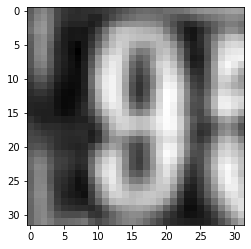

In [80]:
#Showing the image
plt.imshow(X_test[3].reshape(32,32),cmap='gray')

In [81]:
#Predicting the digits
keras_model_final.predict_classes(X_test)[3]

9

-> Image 2

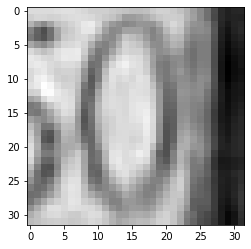

In [71]:
#Showing the image
plt.imshow(X_test[20].reshape(32,32),cmap='gray')

In [72]:
#Predicting the digits
keras_model_final.predict_classes(X_test)[20]

0

-> Image 3 

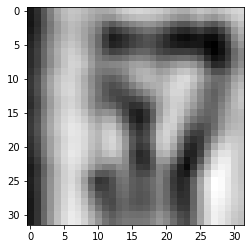

In [82]:
#Showing the image
plt.imshow(X_test[102].reshape(32,32),cmap='gray')

In [83]:
#Predicting the digits
keras_model_final.predict_classes(X_test)[102]

7

In [75]:
#Predicting for all images
y_pred=keras_model_final.predict_classes(X_test)
print(y_pred)

[5 7 2 ... 7 9 2]


# Differences and trade-offs between traditional KNN and NN classifiers with the help of classification metrics

* KNN requires more time to find the nearest neibhours. It takes less time to train the model. It took more than 24hrs to find the best neighbour(k). However, Neural Network takes more time to train the model.
* In KNN, we have only one hyperparameter k while in NN we have so many hyperparameters(Hidden Layers, Hidden Units,learning Rate, Number of Epochs, activations Functions).
* KNN classification metrics shows that the accuracy is 46%. The digit 4 and 6 are classified correctly and achieved approx 60% accuracy. the other digits are not predicted correclty.
* Using NN with batchNormalization we got 74.80% accuracy. We have predicted the classification of the images correctly.

# 6. Print the classification accuracy metrics (10 points)

In [6]:
#Reshape data from 2D to 1D -> 32X32 to 1024
X_train = np.asarray(X_train).reshape(42000,1024)
X_test = np.asarray(X_test).reshape(18000,1024)
X_val = np.asarray(X_val).reshape(60000,1024)

In [ ]:
# Initializing the value of k and finding the accuracies on validation data
k_vals = range(1, 30, 2)
accuracies = []

for k in range(1, 30, 2):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  score = knn.score(X_val, y_val)
  print("k value=%d, accuracy score=%.2f%%" % (k, score * 100))
  accuracies.append(score)
 
# finding the value of k which has the largest accuracy
i = int(np.argmax(accuracies))
print("k=%d value has highest accuracy of %.2f%% on validation data" % (k_vals[i],accuracies[i] * 100))

In [ ]:
# Retraining the model using the best k value and predict the labels on test data

knn = KNeighborsClassifier(n_neighbors=k_vals[i])
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

EVALUATION ON TESTING DATA

[[ 935   43   51   64   71   65  185   40  170  190]
 
 
 [  51 1034  109  122  123   69   68  119   67   66]
 
 
 [  63  135  872  131   82   74   65  168   79  134]
 
 
 [  67  166  127  610   88  229   82   80  149  121]
 
 
 [  85  195   51   71 1039   55  111   35   98   72]
 
 
 [  94  103   71  220   54  588  203   48  205  182]
 
 
 [ 225   74   51   72  102  154  711   33  295  115]
 
 
 [  65  173  146  100   34   38   48 1071   53   80]
 
 
 [ 150   62   59  130   86  153  267   44  675  186]
 
 
 [ 238   87   89  115   60  113  115   65  192  730]]
              
    
                precision    recall  f1-score   support

           0       0.47      0.52      0.49      1814
           1       0.50      0.57      0.53      1828
           2       0.54      0.48      0.51      1803
           3       0.37      0.35      0.36      1719
           4       0.60      0.57      0.59      1812
           5       0.38      0.33      0.36      1768
           6       0.38      0.39      0.39      1832
           7       0.63      0.59      0.61      1808
           8       0.34      0.37      0.36      1812
           9       0.39      0.40      0.40      1804
        

    accuracy                               0.46     18000
   
    macro avg          0.46      0.46      0.46     18000

    weighted avg       0.46      0.46      0.46     18000
